In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Veri setini yükle (Ham haliyle)
df = pd.read_csv('Housing.csv') 

# Verinin ilk 5 satırını görelim
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# 1. Yarışacak Modelleri Hazırlayalım (Senin veri setine uygun olanlar)
modeller = {
    "Linear Regression": LinearRegression(),
    "Random Forest    ": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree    ": DecisionTreeRegressor(random_state=42),
    "KNN (K-Neighbors)": KNeighborsRegressor(),
    "Bayesian Ridge   ": BayesianRidge(), # Naive Bayes'in fiyat tahmini yapan akrabası
    "SVM (SVR)        ": SVR() # Support Vector Machine'in Regresyon versiyonu
}

print("\n" + "="*40)
print("   TÜM MODELLERİN BAŞARI SIRALAMASI")
print("="*40)

# 2. Hepsini tek tek eğitip sonucu yazdıralım
for isim, model in modeller.items():
    # Modeli Eğit
    model.fit(X_train, y_train)
    
    # Tahmin Yap
    y_pred_model = model.predict(X_test)
    
    # Başarıyı Yüzdeye Çevir
    basari = r2_score(y_test, y_pred_model) * 100
    
    # Ekrana Yazdır
    print(f"{isim} Başarısı: %{basari:.2f}")

print("="*40 + "\n")

MODEL                          R2 SKORU   MSE            
------------------------------------------------------------
Çoklu Doğrusal Regresyon       0.6529     1754318687331
Karar Ağacı                    0.4771     2642802637615
Rastgele Orman                 0.6114     1964193399645


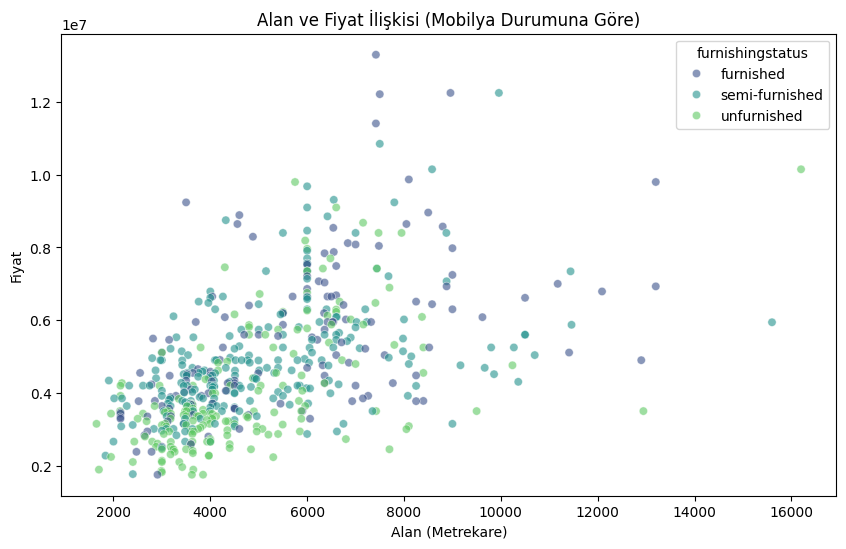

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Adımda yüklediğimiz 'df' verisini kullanıyoruz
# Grafik çizerken hata almamak için geçici bir temizlik yapalım
grafik_verisi = df.dropna().drop_duplicates()

# Grafik Boyutu
plt.figure(figsize=(10, 6))

# Scatter Plot (Dağılım Grafiği) Çizimi
# hue='furnishingstatus': Noktaları mobilya durumuna göre renklendirir
sns.scatterplot(x='area', y='price', data=grafik_verisi, alpha=0.6, hue='furnishingstatus', palette='viridis')

# Başlık ve Eksen İsimleri
plt.title('Alan ve Fiyat İlişkisi (Mobilya Durumuna Göre)')
plt.xlabel('Alan (Metrekare)')
plt.ylabel('Fiyat')

# Grafiği Göster
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Girdi (X) ve Hedef (y) değişkenlerini belirle
# Area: Metrekare, Price: Fiyat
X = df[['area']]
y = df['price']

# 2. Veriyi Eğitim (%80) ve Test (%20) olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Lineer Regresyon modelini kur
model = LinearRegression()

# 4. Modeli eğitim verisiyle eğit
model.fit(X_train, y_train)

# Sonuçları bilgi olarak yazdır (Opsiyonel ama profesyonel durur)
print("Model eğitimi tamamlandı.")
print(f"Eğim (Katsayı): {model.coef_[0]:.2f}")
print(f"Sabit Değer (Intercept): {model.intercept_:.2f}")

Model eğitimi tamamlandı.
Eğim (Katsayı): 425.73
Sabit Değer (Intercept): 2512254.26


R2 Skoru (Model Başarısı): 0.27
Ortalama Kare Hata (MSE): 3675286604768


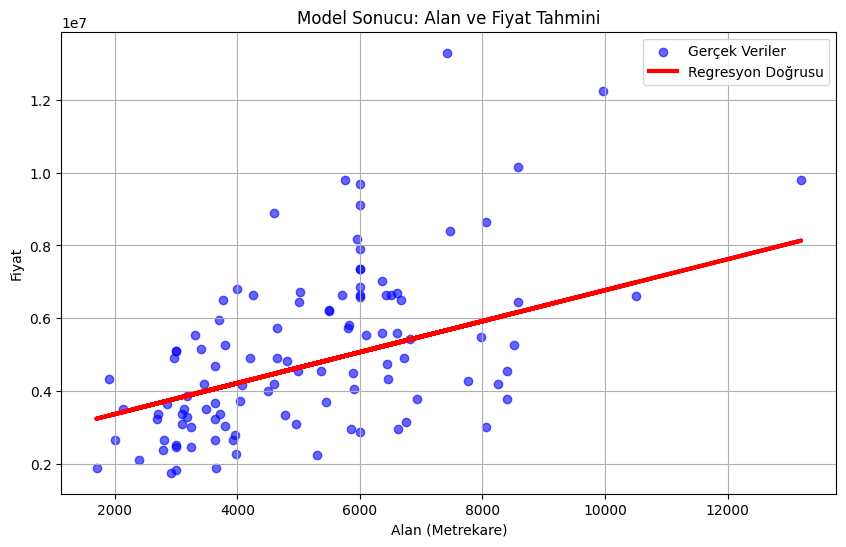

In [17]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# 1. Test verisi üzerinde tahmin yap
y_pred = model.predict(X_test)

# 2. Performans metriklerini hesapla
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Skoru (Model Başarısı): {r2:.2f}")
print(f"Ortalama Kare Hata (MSE): {mse:.0f}")

# 3. Regresyon Grafiğini Çiz
plt.figure(figsize=(10, 6))

# Gerçek test verileri (Mavi Noktalar)
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Gerçek Veriler')

# Modelin tahmin çizgisi (Kırmızı Çizgi)
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regresyon Doğrusu')

plt.title('Model Sonucu: Alan ve Fiyat Tahmini')
plt.xlabel('Alan (Metrekare)')
plt.ylabel('Fiyat')
plt.legend()
plt.grid(True)
plt.show()

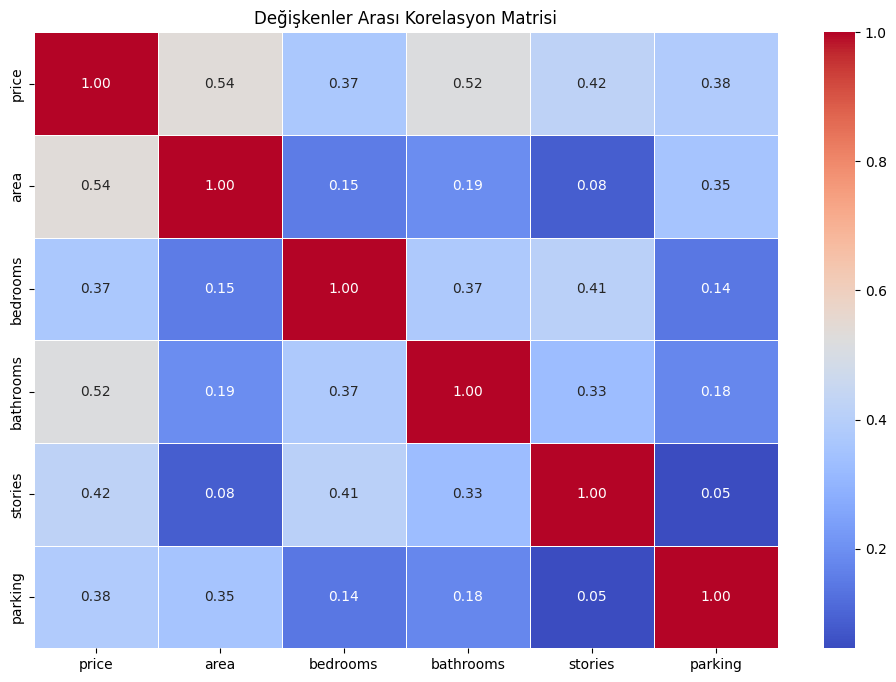

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini tüm sütunlarıyla yükle (Detaylı analiz için)
# Not: Eğer hafızada ham veri varsa tekrar okumaya gerek olmayabilir ama garanti olsun.
df_full = pd.read_csv('Housing.csv')

# Sadece sayısal değişkenleri seç (Korelasyon hesaplaması için)
numeric_data = df_full.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesapla
correlation_matrix = numeric_data.corr()

# Isı Haritasını (Heatmap) oluştur
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()

In [20]:
import pandas as pd

# 1. Tahmin edilecek değeri, eğitimdeki formatla aynı şekilde (DataFrame olarak) hazırlıyoruz
# Bu sayede "Sütun ismi eksik" hatası almayız.
girdi_verisi = pd.DataFrame({'area': [5000]})

# 2. Tahmin yap
tahmin = model.predict(girdi_verisi)

# 3. Sonucu profesyonel formatta yazdır
# {:,.2f} -> Sayıyı binliklerine ayırır (virgül ile) ve kuruş hanesini gösterir.
print(f"Girilen Alan: 5000 m2")
print(f"Modelin Fiyat Tahmini: {tahmin[0]:,.2f}")

Girilen Alan: 5000 m2
Modelin Fiyat Tahmini: 4,640,903.47
